In [16]:
import numpy
import skrf

In [ ]:
def thru2x(thru_path, *args, **kwargs):
        if 'export_path' in kwargs:
            export_path = kwargs['export_path']
        else:
            export_path = '.\\'

        thru =  skrf.Network(thru_path)
        
        f_points = thru.frequency.npoints
        f_list   = thru.frequency

        s_fxr = numpy.zeros([f_points,2,2],dtype=numpy.complex128)
        s11_fxr = numpy.array([])
        s21_fxr = numpy.array([])
        s21_phase = numpy.array([])

        for i in range(0,f_points):
            s11_t = numpy.complex128(thru.s[i][0][0])
            s12_t = numpy.complex128(thru.s[i][0][1])
            s21_t = numpy.complex128(thru.s[i][1][0])
            s22_t = numpy.complex128(thru.s[i][1][1])

            s11_fxr = numpy.append(s11_fxr, numpy.divide((s11_t + s22_t), (2 + s12_t + s21_t)))        # Ref. (5) in [1]
            s21_fxr = numpy.append(s21_fxr, numpy.sqrt(0.5 * (s12_t + s21_t) * (1 - s11_fxr**2)))      # Ref. (6) in [1]
            s21_phase = numpy.append(s21_phase, numpy.angle(s21_fxr[i]) * 180/numpy.pi)

            # s12_fxr = s21_fxr
            # s22_fxr = s11_fxr
            # s_fxr[i] = [[s11_fxr, s12_fxr],[s21_fxr,s22_fxr]]
        pass

        x = s21_phase[1:len(s21_phase)] - s21_phase[0:len(s21_phase)-1]
        a = numpy.array([])
        for j in range(0, len(x)):
            a = numpy.append(a, ((x[j]<-90)*360+(x[j]>90)*(-360)))
        # a = numpy.cumsum(a)
        # a = numpy.insert(a, 0, 0)
        # s21_phase_unwrapped = s21_phase + a
        
        # print(a)
        print(s21_phase)


y = thru2x(r'D:\RF_Microwave_Library\de_embedding\cal_std\sim\thru.s2p', export_path=r'D:\RF_Microwave_Library\de_embedding\cal_std\sim') 

[   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
[   0.    0. -360. -360. -360. -360. -360. -360. -360. -360. -360.]
[   0.  100. -160.  -60.   40.  140.  240.  340.  440.  540.  640.]


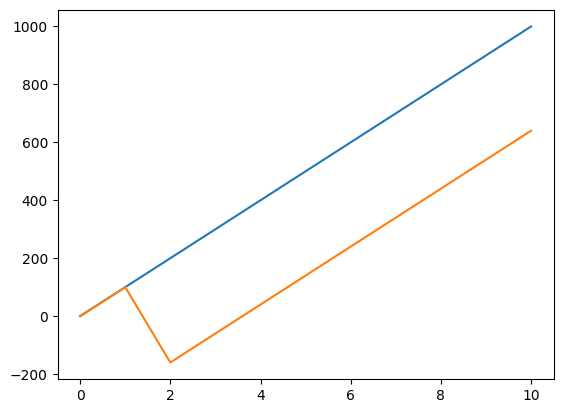

In [88]:
# phase unwrap
import random
import matplotlib
import matplotlib.pyplot

# x = numpy.array(random.sample(range(0,180), 10))
# x = numpy.cumsum(x)

x = numpy.linspace(0, 1000, num=11)
matplotlib.pyplot.plot(x)
print(x)

wrap_offset = numpy.array([])

for i in range(0,len(x)):
    wrapN = numpy.divmod(x[i], 180)[0]
    if (x[i]>180):
        wrap_offset = numpy.append(wrap_offset, -360)
    else:
        wrap_offset = numpy.append(wrap_offset, 0)

print(wrap_offset)

x = x + wrap_offset
print(x)
matplotlib.pyplot.plot(x)